In [236]:
#############################################################################################################################################
############# The droplet evaporation process considering the solute-concentration dependence of the internal water diffusivity #############
################################### (The numerical method described in Supporting Information section C) ####################################
#############################################################################################################################################

import math
import numpy as np
from scipy import constants
from cmath import sqrt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import integrate
from scipy.integrate import odeint

#################### numerical constants used in calculations ####################
# thermal energy:
kbt= constants.Boltzmann * (273.15+25)
# water diffusion constant in air:
D_w = 2.5*10**-5
# water diffusion constant in liquid water:
D_wl = 2.3e-9
# liquid water molecular volume:
v_w = 3*10**-29
# saturated vapor water concentration:
c_g = 7.69*10**23
# saturated vapor water concentration at T=0K:
c_g0 = 1.62*10**23
# molecular evaporation enthalpy of water:
h_ev = 7.3*10**-20
# water molecular mass:
m_w = 2.99*10**-26
# liquid water density:
rho = 997
# nominal gravitational constant:
g = 9.81
# density of air:
rho_air = 1.18
# heat conductivity of air:
lamb_air = 0.026
# condensation reaction rate constant:
k_c = (kbt/m_w)**0.5
#  Avogadro constant:
N_A = 6.02214076e23

# numerical prefactors:
alpha = D_wl/(D_w*c_g*v_w)
eps_T = (D_w*c_g*h_ev)/lamb_air
eps_c = (c_g-c_g0)/(c_g*(25-0))

#################### inputs ####################
# initial droplet radius:
R_0 = 50e-6
# water activity coefficient:
gama = 1
# relative humidity
RH = 0.5
# initial solute volume fraction:
phi_0 = 0.01

Text(0, 0.5, '$ΔT$ (K)')

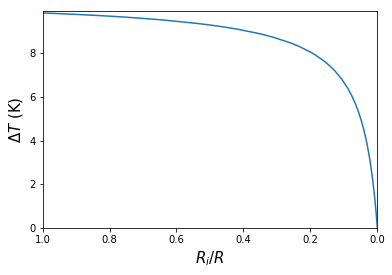

In [237]:
##################################################################################################################
#################### calclation of the temperature reduction at the droplet surface (Delta_T) ####################
##################################################################################################################

# asumption: v_s = v_w

# equilibrium solute volume fraction:
phi_ev = 1-RH/gama
# equilibrium droplet radius:
R_ev = R_0*(phi_0/phi_ev)**(1/3)
# the constant that accounts for solute-concentration dependence of internal water diffusivity (Eq. C1):
Beta = -(0.065)/(N_A*1000)
# initial water diffusion coefficient in liquid solution:
D0_Dwl = 1-Beta*(phi_0/v_w)
# equilibrium water diffusion coefficient in liquid solution:
Dev_Dwl = 1-Beta*(phi_ev/v_w)
# surface temperature reduction in the absence of solutes:
DelT_0 = 19.9*(1-RH)

# R_i/R:
Ri_R = []
# Delta_T:
Delta_T = []

DelT = DelT_0
for i in range(5000):
    Ri__R = (1-(0.0002*i))
    me = 1
    for j in range(10001):
        if me > 0:
            # solution of Eq. C13:
            DelT = DelT - (0.0001*j)
            coef = gama*(1-eps_c*DelT)
            F = (eps_T*v_w*coef/Beta)*(-1+(Beta/v_w)-(Beta*RH/(v_w*coef)) + (coef/alpha)*(1-(1/Ri__R))+((coef**2/alpha**2)*(1-(1/Ri__R))**2-(2*(1-(Beta/v_w)+(Beta*RH/(v_w*coef)))*(coef/alpha)*(1-(1/Ri__R)))+D0_Dwl**2)**0.5)
            if (DelT-F)/F < 0.001:
                Ri_R.append (Ri__R)
                Delta_T.append (DelT)
                me = -1

# adding points at (0,0) to make the fitting process more efficient
for j in range(70):
    Ri_R.append (0)
    Delta_T.append (0)
                
plt.plot (Ri_R, Delta_T)
plt.xlim(left=1)
plt.xlim(right=0)
plt.ylim(bottom=0)
plt.ylim(top=DelT_0)
plt.xlabel("$R_i/R$", fontsize=15)
plt.ylabel("$\u0394T$ (K)", fontsize=15)

[ 1.50388188e+03 -5.79690663e+03  9.08215729e+03 -7.43724263e+03
  3.41444526e+03 -8.81324051e+02  1.24616867e+02  4.06907523e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]


Text(0, 0.5, '$ΔT$ (K)')

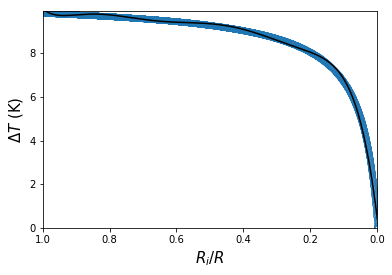

In [238]:
########################################################################################################
#################### fitting suitable function to the data to obtain Detta_T(R_i/R) ####################
########################################################################################################

def func(x, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12):
    return a1*(x**7)+a2*(x**6)+a3*(x**5)+a4*(x**4)+a5*(x**3)+a6*(x**2)+a7*x+a8
#     return a1*np.exp(x**a2)+a3*np.exp(x**a4)+a5*np.exp(x**a6)+a7*np.exp(x**a8)+a9*np.exp(x**a10)+a11*np.exp(x**a12)

popts, pcov = optimize.curve_fit(func, Ri_R, Delta_T)
print(popts)

Delta_T_fit = []
for k, val in enumerate(Ri_R):
    Delta_T_fit.append (popts[0]*(val**7)+popts[1]*(val**6)+popts[2]*(val**5)+popts[3]*(val**4)+popts[4]*(val**3)+popts[5]*(val**2)+popts[6]*val+popts[7])
#     Delta_T_fit.append (popts[0]*np.exp(val**popts[1])+popts[2]*np.exp(val**popts[3])+popts[4]*np.exp(val**popts[5])+popts[6]*np.exp(val**popts[7])+popts[8]*np.exp(val**popts[9])+popts[10]*np.exp(val**popts[11]))


plt.plot (Ri_R , Delta_T, 'o', color='tab:blue', mfc='white', markersize=5)    
plt.plot (Ri_R, Delta_T_fit, color='black')
plt.xlim(left=1)
plt.xlim(right=0)
plt.ylim(bottom=0)
plt.ylim(top=DelT_0)
plt.xlabel("$R_i/R$", fontsize=15)
plt.ylabel("$\u0394T$ (K)", fontsize=15)

0.469


Text(0, 0.5, '$R_i/R$')

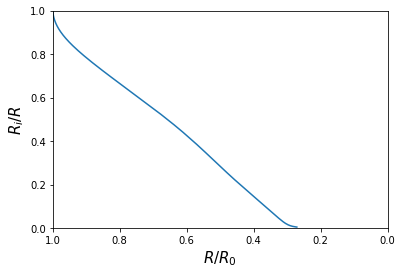

In [239]:
###########################################################
#################### calclation of R_i ####################
###########################################################

# solubility limit (of NaCl):
Cs_max = 6.1
# R/R_0
R_R0 = []
# R_i/R
R_i_R = []
# c_sol(R)
C_sol_R = []


Ri = R_0
for i in range(1001):
    if Ri > 0:
        RR = R_0*(1-(0.001*i))
        nn=1
        for j in range(1000001):
            if nn > 0:
                Ri = RR-((R_0*0.00002)*j)
                
                if Ri > 0:
                    # solution of Eq. C14:
                    DelT = popts[0]*((Ri/RR)**7)+popts[1]*((Ri/RR)**6)+popts[2]*((Ri/RR)**5)+popts[3]*((Ri/RR)**4)+popts[4]*((Ri/RR)**3)+popts[5]*((Ri/RR)**2)+popts[6]*(Ri/RR)+popts[7]                                                             
                    g_R = lambda x: x**2*pow((D0_Dwl**2+2*(Beta/(eps_T*alpha*v_w))*DelT*(RR/x-RR/Ri)),0.5)              
                    intg = integrate.quad(g_R, Ri, RR)
                    right = (Beta/3)*(phi_0/v_w)*(Ri**3-50e-6**3)+(1/3)*(RR**3-Ri**3)

                    if abs(intg[0]-right) < 0.001*right:
                        R_R0.append (RR/R_0)
                        R_i_R.append (Ri/RR)
                        # from Eq. C16, we have:
                        CsolR = ((1/Beta)*(1-(D0_Dwl**2+((2*Beta)/(alpha*v_w*eps_T))*DelT*(1-RR/Ri))**0.5))/(N_A*1000)
                        C_sol_R.append (CsolR)
                        nn=-1
                        if abs(CsolR-Cs_max) < 0.01:
                            # the droplet radius where crust formation sets in at the surface: 
                            R_crust = RR
                            print (R_crust/R_0)
                        

            
# plt.plot (R_R0, C_sol_R)
plt.plot (R_R0, R_i_R)
plt.xlim(left=1)
plt.xlim(right=0)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.xlabel("$R/R_0$", fontsize=15)
plt.ylabel("$R_i/R$", fontsize=15)

[  95.73811866 -386.38261306  647.55853455 -577.25826806  289.54170146
  -78.85725751   11.37685339   -0.74860892    1.            1.        ]


Text(0, 0.5, '$R_i/R$')

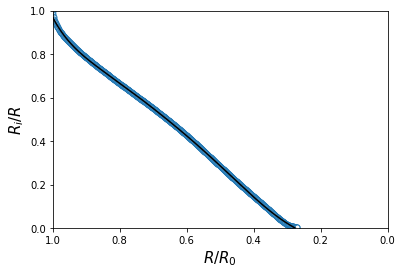

In [240]:
###############################################################################
#################### fitting suitable function to the data ####################
###############################################################################

# different fit functions are defined and used depending on which one fits the data best
def func(x, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10):
    return a1*(x**7)+a2*(x**6)+a3*(x**5)+a4*(x**4)+a5*(x**3)+a6*(x**2)+a7*x+a8
#     return a1*(x**a2)+a3*(x**a4)+a5*(x**a6)+a7
#     return a1*np.exp(x**a2)+a3*np.exp(x**a4)+a5*np.exp(x**a6)+a7

popt, pcov = optimize.curve_fit(func, R_R0, R_i_R)
print(popt)

R_i_R_fit = []
for k, val in enumerate(R_R0):
    R_i_R_fit.append (popt[0]*(val**7)+popt[1]*(val**6)+popt[2]*(val**5)+popt[3]*(val**4)+popt[4]*(val**3)+popt[5]*(val**2)+popt[6]*val+popt[7])
#     R_i_R_fit.append (popt[0]*(val**popt[1])+popt[2]*(val**popt[3])+popt[4]*(val**popt[5])+popt[6])
#     R_i_R_fit.append (popt[0]*np.exp(val**popt[1])+popt[2]*np.exp(val**popt[3])+popt[4]*np.exp(val**popt[5])+popt[6])


plt.plot (R_R0 , R_i_R, 'o', color='tab:blue', mfc='white', markersize=5)    
plt.plot (R_R0, R_i_R_fit, color='black')
plt.xlim(left=1)
plt.xlim(right=0)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.xlabel("$R/R_0$", fontsize=15)
plt.ylabel("$R_i/R$", fontsize=15)

Text(0, 0.5, '$R/R_{ev}$')

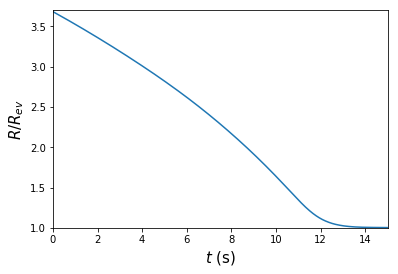

In [241]:
############################################################
#################### calclation of R(t) ####################
############################################################

# solution of Eq. C15
def dy_dx(y, x):
    return -D_wl/(alpha*eps_T*y)*(popts[0]*((popt[0]*((y/R_0)**7)+popt[1]*((y/R_0)**6)+popt[2]*((y/R_0)**5)+popt[3]*((y/R_0)**4)+popt[4]*((y/R_0)**3)+popt[5]*((y/R_0)**2)+popt[6]*(y/R_0)+popt[7])**7)+popts[1]*(((popt[0]*((y/R_0)**7)+popt[1]*((y/R_0)**6)+popt[2]*((y/R_0)**5)+popt[3]*((y/R_0)**4)+popt[4]*((y/R_0)**3)+popt[5]*((y/R_0)**2)+popt[6]*(y/R_0)+popt[7]))**6)+popts[2]*(((popt[0]*((y/R_0)**7)+popt[1]*((y/R_0)**6)+popt[2]*((y/R_0)**5)+popt[3]*((y/R_0)**4)+popt[4]*((y/R_0)**3)+popt[5]*((y/R_0)**2)+popt[6]*(y/R_0)+popt[7]))**5)+popts[3]*(((popt[0]*((y/R_0)**7)+popt[1]*((y/R_0)**6)+popt[2]*((y/R_0)**5)+popt[3]*((y/R_0)**4)+popt[4]*((y/R_0)**3)+popt[5]*((y/R_0)**2)+popt[6]*(y/R_0)+popt[7]))**4)+popts[4]*(((popt[0]*((y/R_0)**7)+popt[1]*((y/R_0)**6)+popt[2]*((y/R_0)**5)+popt[3]*((y/R_0)**4)+popt[4]*((y/R_0)**3)+popt[5]*((y/R_0)**2)+popt[6]*(y/R_0)+popt[7]))**3)+popts[5]*(((popt[0]*((y/R_0)**7)+popt[1]*((y/R_0)**6)+popt[2]*((y/R_0)**5)+popt[3]*((y/R_0)**4)+popt[4]*((y/R_0)**3)+popt[5]*((y/R_0)**2)+popt[6]*(y/R_0)+popt[7]))**2)+popts[6]*((popt[0]*((y/R_0)**7)+popt[1]*((y/R_0)**6)+popt[2]*((y/R_0)**5)+popt[3]*((y/R_0)**4)+popt[4]*((y/R_0)**3)+popt[5]*((y/R_0)**2)+popt[6]*(y/R_0)+popt[7]))+popts[7])
#         return (Zarib/y)*(popts[0]*(popt[0]*np.exp((y/R_0)**popt[1])+popt[2]*np.exp((y/R_0)**popt[3])+popt[4]*np.exp((y/R_0)**popt[5]))**7+popts[1]*(popt[0]*np.exp((y/R_0)**popt[1])+popt[2]*np.exp((y/R_0)**popt[3])+popt[4]*np.exp((y/R_0)**popt[5]))**6+popts[2]*(popt[0]*np.exp((y/R_0)**popt[1])+popt[2]*np.exp((y/R_0)**popt[3])+popt[4]*np.exp((y/R_0)**popt[5]))**5+popts[3]*(popt[0]*np.exp((y/R_0)**popt[1])+popt[2]*np.exp((y/R_0)**popt[3])+popt[4]*np.exp((y/R_0)**popt[5]))**4+popts[4]*(popt[0]*np.exp((y/R_0)**popt[1])+popt[2]*np.exp((y/R_0)**popt[3])+popt[4]*np.exp((y/R_0)**popt[5]))**3+popts[5]*(popt[0]*np.exp((y/R_0)**popt[1])+popt[2]*np.exp((y/R_0)**popt[3])+popt[4]*np.exp((y/R_0)**popt[5]))**2+popts[6]*(popt[0]*np.exp((y/R_0)**popt[1])+popt[2]*np.exp((y/R_0)**popt[3])+popt[4]*np.exp((y/R_0)**popt[5]))+popts[7])

t = np.linspace(0,15,num=1000)
Rt = odeint(dy_dx, R_0, t)
Rt = np.array(Rt).flatten()
Rt_Rev = np.array(Rt).flatten()/R_ev


plt.plot(t, Rt_Rev)
plt.xlim(left=0)
plt.xlim(right=15)
plt.ylim(bottom=1)
plt.ylim(top=3.7)
plt.xlabel("$t$ (s)", fontsize=15)
plt.ylabel("$R/R_{ev}$", fontsize=15)